# Fast Fourier Transform Tutorial
### James Saslow
### 3/4/2023


This code is provides a tutorial on how to use the FFT algorithm through the scipy library and implimenting appropriate data visualization such as a histogram plot of frequencies color coded with relative phases of each composite sine wave.

In [ ]:
import numpy as np
import pylab as plt
from scipy.fft import rfft, rfftfreq
import matplotlib.cm as cm
from mycolorpy import colorlist as mcp
import matplotlib as mpl
import pandas as pd

In [45]:
def mag(z):
    return np.real(np.sqrt(np.conjugate(z)*z))


# Finds peak values in FFT
def crit(array):
    crit_index = []
    for i in range(1, len(array)-1):
        if (array[i]>array[i-1] and array[i]> array[i+1]):
            crit_index.append(i)
    return crit_index

In [46]:
N = 50000
t = np.linspace(0,2*np.pi,N)
dt = t[1]-t[0]
conv = np.pi/180

x = np.cos(t)- np.cos(5*t)/3 + 0.8*np.sin(10*t)

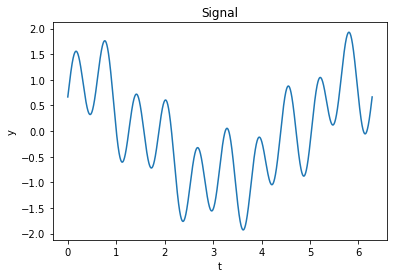

In [47]:
plt.plot(t,x)
plt.title('Signal')
plt.xlabel('t')
plt.ylabel('y')
plt.show()

In [48]:
yf = rfft(x)/(N//2)
xf = rfftfreq(N, dt)*2*np.pi

yf_mag = mag(yf)

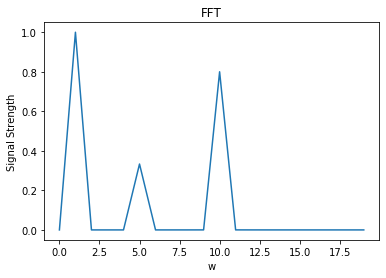

In [49]:
plt.plot(xf[:20],yf_mag[:20])
plt.title('FFT')
plt.xlabel('w')
plt.ylabel('Signal Strength')
plt.show()

In [50]:
crit_index = crit(yf_mag)

peak_signal = np.round(yf_mag[crit_index],2)
peak_freq   = np.round(xf[crit_index],2)

phases = np.angle(yf[crit_index])

In [51]:
hist = np.zeros((int(max(peak_freq))))
for i in range(len(hist)):
    for j in range(len(peak_signal)):
        if i+1 == peak_freq[j]:
            hist[i] = peak_signal[j]

In [52]:
# Displaying complex values

peak_phase = np.angle(yf[crit_index])/(2*np.pi)
for i in range(len(peak_phase)):
    if peak_phase[i] < 0:
        peak_phase[i] += 1


num = 2**4 # Must be 2 to some power -- how many times we divide the color spectrum
color1=mcp.gen_color(cmap="hsv",n=int(num))
# print(color1)
color_index = np.round(peak_phase*num)
# print(color_index)

my_color_index = np.ones((int(max(peak_freq))))
for i in range(len(hist)):
    for j in range(len(peak_signal)):
        if i+1 == peak_freq[j]:
            my_color_index[i] = color_index[j]
            
            
            
my_colors = []
for i in range(len(my_color_index)):
    my_colors.append(color1[int(my_color_index[i])])

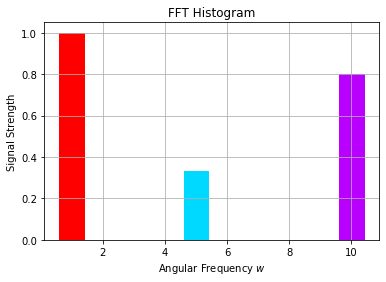

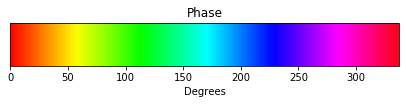

In [53]:
barlist = plt.bar(np.linspace(1,int(max(peak_freq)),int(max(peak_freq))),hist)
for i in range(len(my_colors)):
    barlist[i].set_color(my_colors[i])
    
plt.grid()
plt.title('FFT Histogram')
plt.xlabel('Angular Frequency $w$')
plt.ylabel('Signal Strength')
plt.show()

a = np.array([[0,1]])
plt.figure(figsize=(9, 1.5))
img = plt.imshow(a, cmap="hsv")
plt.gca().set_visible(False)
cax = plt.axes([0.1, 0.2, 0.6, 0.4])
plt.colorbar(orientation = 'horizontal',cax=cax)
plt.clim(0,360*(1-1/num))
plt.title('Phase')
plt.xlabel('Degrees')
plt.savefig("colorbar.pdf")

In [62]:
pd.set_option('display.max_rows', None)

dfw = pd.DataFrame({'Amplitudes':peak_signal,
               'Angular Frequencies':peak_freq,
               'Phases':phases})
display(dfw)


x_recovered = np.zeros(N)
for i in range(len(peak_freq)):
    x_recovered += peak_signal[i] * np.cos(peak_freq[i]*t + phases[i])

,Amplitudes,Angular Frequencies,Phases
0,1.00,1.0,0.000060
1,0.33,5.0,-3.141214
2,0.80,10.0,-1.570163


In [56]:
# Root mean square error of the algorithm
RSME = np.sqrt(sum((x - x_recovered)**2)/N)
print('RMSE = ', RSME)

RMSE =  0.0023861575658714177
